# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras
from keras.optimizers import Adam, Adagrad, SGD, RMSprop
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
opitimizers = [Adam, Adagrad, SGD, RMSprop]
B_size = 64
epochs = 50

In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for op in opitimizers:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(optimizer=op(), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    model.fit(x_train, y_train,
              validation_data = (x_test, y_test),
              epochs = epochs,
              batch_size = B_size,
             )
    tag = f'fit_with_{op.__name__}'
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    results[tag] = dict(train_loss=train_loss, valid_loss=valid_loss, train_acc=train_acc, valid_acc=valid_acc)
    

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 22s 449

50000/50000 [==============================] - 22s 435us/step - loss: 0.7866 - accuracy: 0.7148 - val_loss: 1.9037 - val_accuracy: 0.5020
Epoch 49/50
50000/50000 [==============================] - 23s 468us/step - loss: 0.7785 - accuracy: 0.7195 - val_loss: 1.8938 - val_accuracy: 0.4934
Epoch 50/50
50000/50000 [==============================] - 23s 468us/step - loss: 0.7651 - accuracy: 0.7212 - val_loss: 1.8644 - val_accuracy: 0.4989
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (De

50000/50000 [==============================] - 18s 366us/step - loss: 0.9185 - accuracy: 0.6824 - val_loss: 1.3967 - val_accuracy: 0.5316
Epoch 46/50
50000/50000 [==============================] - 19s 372us/step - loss: 0.9101 - accuracy: 0.6840 - val_loss: 1.4139 - val_accuracy: 0.5251
Epoch 47/50
50000/50000 [==============================] - 19s 380us/step - loss: 0.9012 - accuracy: 0.6888 - val_loss: 1.4202 - val_accuracy: 0.5354
Epoch 48/50
50000/50000 [==============================] - 23s 459us/step - loss: 0.8913 - accuracy: 0.6906 - val_loss: 1.5057 - val_accuracy: 0.5072
Epoch 49/50
50000/50000 [==============================] - 21s 426us/step - loss: 0.8837 - accuracy: 0.6941 - val_loss: 1.4180 - val_accuracy: 0.5289
Epoch 50/50
50000/50000 [==============================] - 17s 340us/step - loss: 0.8762 - accuracy: 0.6972 - val_loss: 1.4288 - val_accuracy: 0.5273
Model: "model_3"
_________________________________________________________________
Layer (type)                 

50000/50000 [==============================] - 17s 340us/step - loss: 0.8971 - accuracy: 0.6849 - val_loss: 1.5624 - val_accuracy: 0.4882
Epoch 43/50
50000/50000 [==============================] - 28s 563us/step - loss: 0.8815 - accuracy: 0.6902 - val_loss: 1.5962 - val_accuracy: 0.4887
Epoch 44/50
50000/50000 [==============================] - 22s 432us/step - loss: 0.8684 - accuracy: 0.6943 - val_loss: 1.4610 - val_accuracy: 0.5190
Epoch 45/50
50000/50000 [==============================] - 12s 245us/step - loss: 0.8512 - accuracy: 0.7005 - val_loss: 1.5701 - val_accuracy: 0.4867
Epoch 46/50
50000/50000 [==============================] - 13s 269us/step - loss: 0.8406 - accuracy: 0.7056 - val_loss: 1.6133 - val_accuracy: 0.4958
Epoch 47/50
50000/50000 [==============================] - 14s 284us/step - loss: 0.8264 - accuracy: 0.7065 - val_loss: 1.7030 - val_accuracy: 0.4801
Epoch 48/50
50000/50000 [==============================] - 14s 271us/step - loss: 0.8124 - accuracy: 0.7174 - va

50000/50000 [==============================] - 20s 405us/step - loss: 1.2806 - accuracy: 0.5522 - val_loss: 1.7803 - val_accuracy: 0.4646
Epoch 40/50
50000/50000 [==============================] - 19s 380us/step - loss: 1.2819 - accuracy: 0.5483 - val_loss: 1.6848 - val_accuracy: 0.4740
Epoch 41/50
50000/50000 [==============================] - 19s 378us/step - loss: 1.2716 - accuracy: 0.5527 - val_loss: 1.6223 - val_accuracy: 0.4800
Epoch 42/50
50000/50000 [==============================] - 19s 371us/step - loss: 1.2670 - accuracy: 0.5556 - val_loss: 1.6009 - val_accuracy: 0.4834
Epoch 43/50
50000/50000 [==============================] - 19s 376us/step - loss: 1.2664 - accuracy: 0.5576 - val_loss: 1.6348 - val_accuracy: 0.4705
Epoch 44/50
50000/50000 [==============================] - 19s 371us/step - loss: 1.2652 - accuracy: 0.5582 - val_loss: 1.8296 - val_accuracy: 0.4483
Epoch 45/50
50000/50000 [==============================] - 19s 371us/step - loss: 1.2604 - accuracy: 0.5542 - va

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

'\n將實驗結果繪出\n'

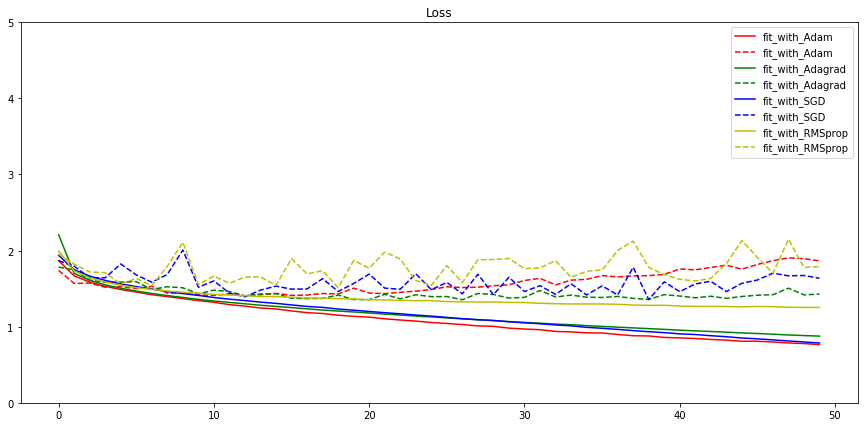

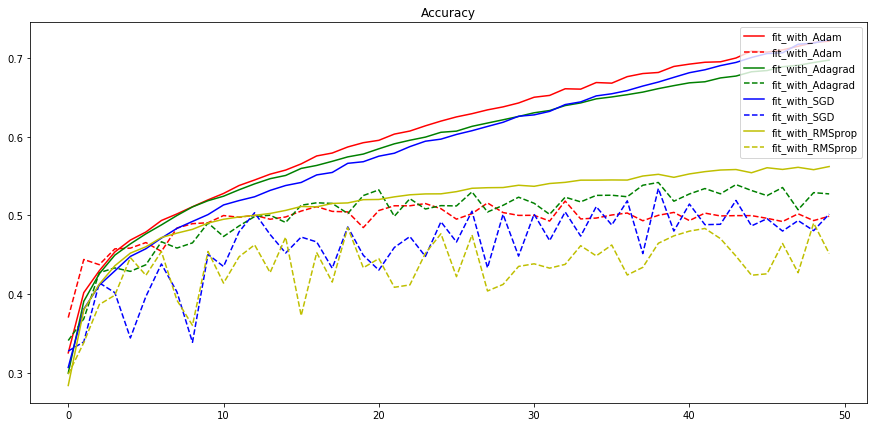

In [12]:
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(15,7))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend(loc=1)
plt.show()

plt.figure(figsize=(15,7))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_acc'])),results[cond]['valid_acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc=1)
plt.show()